---

# Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is a crucial step in the data science process. It involves analyzing datasets to summarize their main characteristics and gain insights before applying more complex modeling techniques. EDA helps in understanding the data, detecting anomalies, discovering patterns, and testing hypotheses.

## Key Goals of EDA:
1. **Understand the structure of the data**: Identify data types, variable distributions, and relationships.
2. **Identify data quality issues**: Detect missing values, outliers, and anomalies.
3. **Spot patterns and relationships**: Find correlations and trends that may guide modeling.
4. **Make data-driven hypotheses**: Generate hypotheses based on insights and trends from the data.

## Key Activities in EDA:

### 1. Descriptive Statistics
- Calculate basic metrics such as mean, median, mode, standard deviation, skewness, and kurtosis.
- Provides an overall summary of the data distribution.

```python
# Example in Python using pandas
df.describe()
```

### 2. Data Visualization
Visualizations help in uncovering trends, patterns, and relationships that may not be apparent from raw numbers.
- **Histograms**: Show the distribution of numerical variables.
- **Box plots**: Highlight outliers and the spread of the data.
- **Scatter plots**: Examine relationships between two numerical variables.
- **Correlation matrices**: Assess the strength and direction of relationships between features.

```python
# Example visualizing with matplotlib and seaborn
import seaborn as sns
sns.pairplot(df)
```

### 3. Missing Data Analysis
- Check for missing or null values.
- Explore the patterns of missing data and how they might affect the analysis or model performance.
- Decide on how to handle missing data (e.g., imputation, removal).

```python
# Checking for missing values
df.isnull().sum()
```

### 4. Outlier Detection
- Outliers are extreme values that may distort the results of the analysis. They can be detected using visual tools like box plots or statistical methods like Z-scores.

```python
# Using a boxplot to detect outliers
sns.boxplot(df['column'])
```

### 5. Feature Relationships
- Examine how variables interact with each other. Techniques like **correlation matrices** or **scatter plots** help reveal relationships and dependencies.
- Categorical variables can be analyzed with **grouped bar plots** or **pivot tables**.

```python
# Correlation matrix to find relationships between numerical features
df.corr()
sns.heatmap(df.corr(), annot=True)
```

### 6. Hypothesis Testing
- EDA often involves testing initial hypotheses or assumptions about the data, guiding further modeling efforts.
- For example, you might test if certain features significantly impact the target variable (e.g., through t-tests, ANOVA, or chi-square tests).

## Importance of EDA:
- **Informs Feature Selection**: Helps identify important features or redundant variables to focus on during the modeling phase.
- **Data Quality Check**: Detects issues like missing data, outliers, or data entry errors.
- **Guides Modeling**: Helps determine the most appropriate algorithms and techniques based on the nature of the data (e.g., the distribution of variables or relationships between them).
- **Reduces Complexity**: Early insights can simplify the dataset, making it more manageable and interpretable.

## Example Workflow of EDA:
1. **Start with Descriptive Statistics**: Summarize the basic metrics of your data.
2. **Visualize the Data**: Use plots to uncover hidden patterns and relationships.
3. **Handle Missing Values**: Address any missing or incomplete data.
4. **Identify Outliers**: Detect and handle extreme values that could skew analysis.
5. **Analyze Relationships**: Study correlations and associations between variables.

## Tools for EDA:
- **Python**:
  - Libraries: `pandas`, `matplotlib`, `seaborn`, `plotly`
- **R**:
  - Libraries: `ggplot2`, `dplyr`, `tidyverse`

---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/refs/heads/main/data_clean.csv", index_col=0)
df


,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [3]:
df.describe()


,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [4]:
df.dtypes


Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [5]:
df["Month"].unique()


array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [6]:
df["Month"].replace("May",5, inplace=True)


/tmp/ipykernel_2237/3999437202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Month"].replace("May",5, inplace=True)


In [7]:
df["Month"].astype(int,True)


1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int64

In [8]:
df['Month'] = df['Month'].astype(int)


In [9]:
df.dtypes


Ozone      float64
Solar.R    float64
Wind       float64
Month        int64
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

## Duplicates

In [10]:
df.duplicated()


1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [11]:
df.duplicated().sum()


np.int64(1)

In [12]:
df.drop_duplicates(inplace= True)


In [13]:
df.shape


(157, 8)

In [14]:
df.head()


,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


In [15]:
df.drop(columns=["Year"],inplace= True)


In [16]:
df.isnull().sum()


Ozone      38
Solar.R     7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [17]:
for i in df.isna().sum():
    print((i/len(df))*100) 


24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


In [18]:
#replace the Missing Value in Ozone Column
df['Ozone'].fillna((df["Ozone"].median()) , inplace=True)


/tmp/ipykernel_2237/334177798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ozone'].fillna((df["Ozone"].median()) , inplace=True)


In [19]:
# Replace the Missing Value in Solar.R Column
df["Solar.R"].fillna(df['Solar.R'].mean(),inplace=True)


/tmp/ipykernel_2237/532245247.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Solar.R"].fillna(df['Solar.R'].mean(),inplace=True)


In [20]:
# Replace the Missing Value in Weather Column
df["Weather"].fillna(df['Weather'].mode()[0],inplace=True)


/tmp/ipykernel_2237/1506053667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weather"].fillna(df['Weather'].mode()[0],inplace=True)


In [21]:
df.isna().sum()


Ozone      0
Solar.R    0
Wind       0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64

## Outlier Detection 

In [22]:
df.describe()


,Ozone,Solar.R,Wind,Month,Day,Temp
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,185.366667,9.929936,7.019108,15.929936,77.745223
std,28.781992,86.998999,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


<Axes: ylabel='Ozone'>

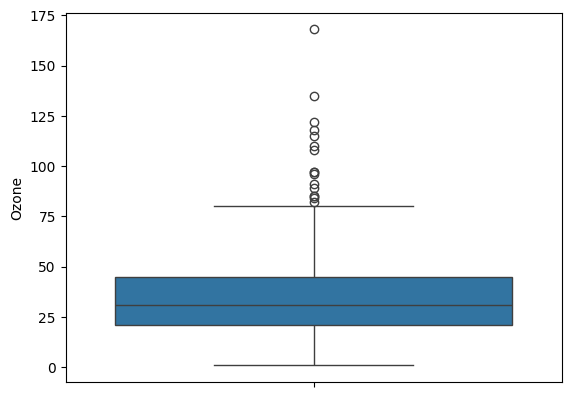

In [23]:
sns.boxplot(df['Ozone'])    


<Axes: xlabel='Ozone', ylabel='Density'>

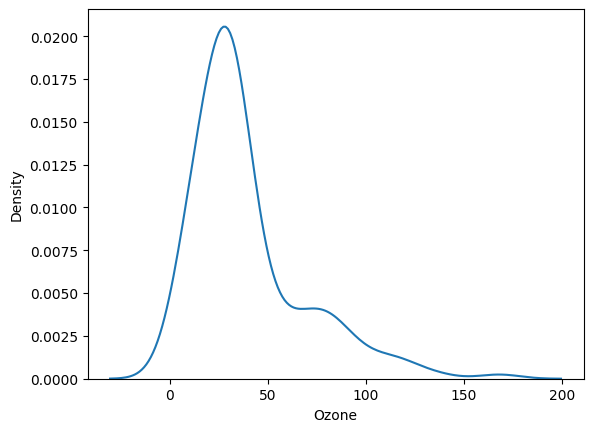

In [24]:
sns.kdeplot(df["Ozone"])


<Axes: xlabel='Ozone', ylabel='Count'>

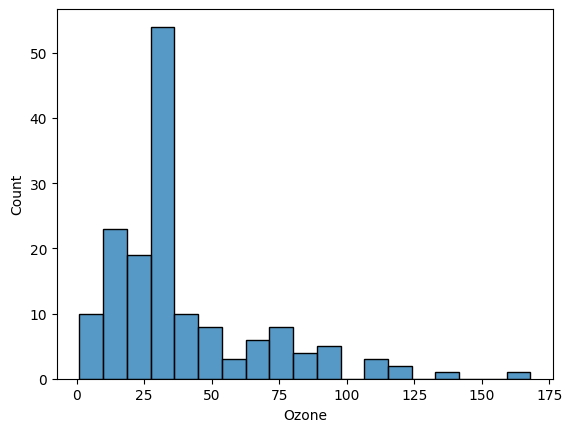

In [25]:
sns.histplot(df['Ozone'])


<Axes: >

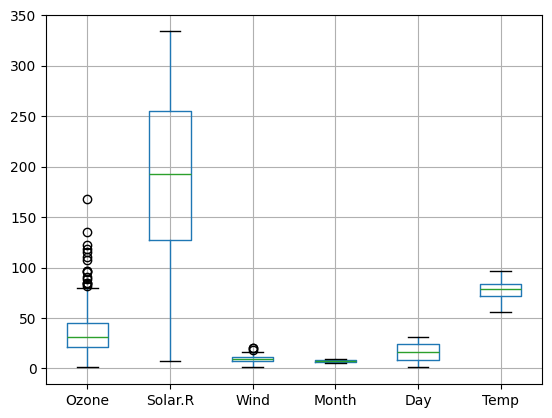

In [26]:
df.boxplot()


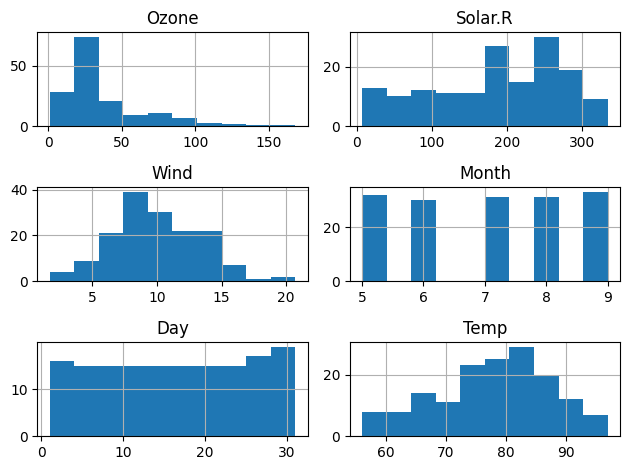

In [27]:
df.hist()
plt.tight_layout()


In [28]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200


In [29]:
import numpy as np

def demonstrate_where_function():
    # Create two arrays
    arr1 = np.array([1, 2, 3, 4, 5])
    arr2 = np.array([10, 20, 30, 40, 50])

    # Use np.where to create a new array where elements are from arr1 if they are greater than 3, otherwise from arr2
    result = np.where(arr1 > 3, arr1, arr2)

    return result


In [30]:

# Find the lower and upper bounds for each column
def capping(Data , column):
    for col in column:
        q1 = Data[col].quantile(0.25)
        q3 = Data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        uperr_bound = q3 + (1.5 * iqr)
        df[col] = np.where(df[col] > uperr_bound,uperr_bound , np.where(df[col] < lower_bound , lower_bound, df[col]) )
    return df


In [31]:
capping(df,df.drop(columns= "Weather").columns)


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.000000,7.4,5.0,1.0,67.0,S
2,36.0,118.000000,8.0,5.0,2.0,72.0,C
3,12.0,149.000000,12.6,5.0,3.0,74.0,PS
4,18.0,313.000000,11.5,5.0,4.0,62.0,S
5,31.0,185.366667,14.3,5.0,5.0,56.0,S
...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9.0,30.0,68.0,S
154,41.0,190.000000,7.4,5.0,1.0,67.0,C
155,30.0,193.000000,6.9,9.0,26.0,70.0,PS
156,31.0,145.000000,13.2,9.0,27.0,77.0,S


<Axes: >

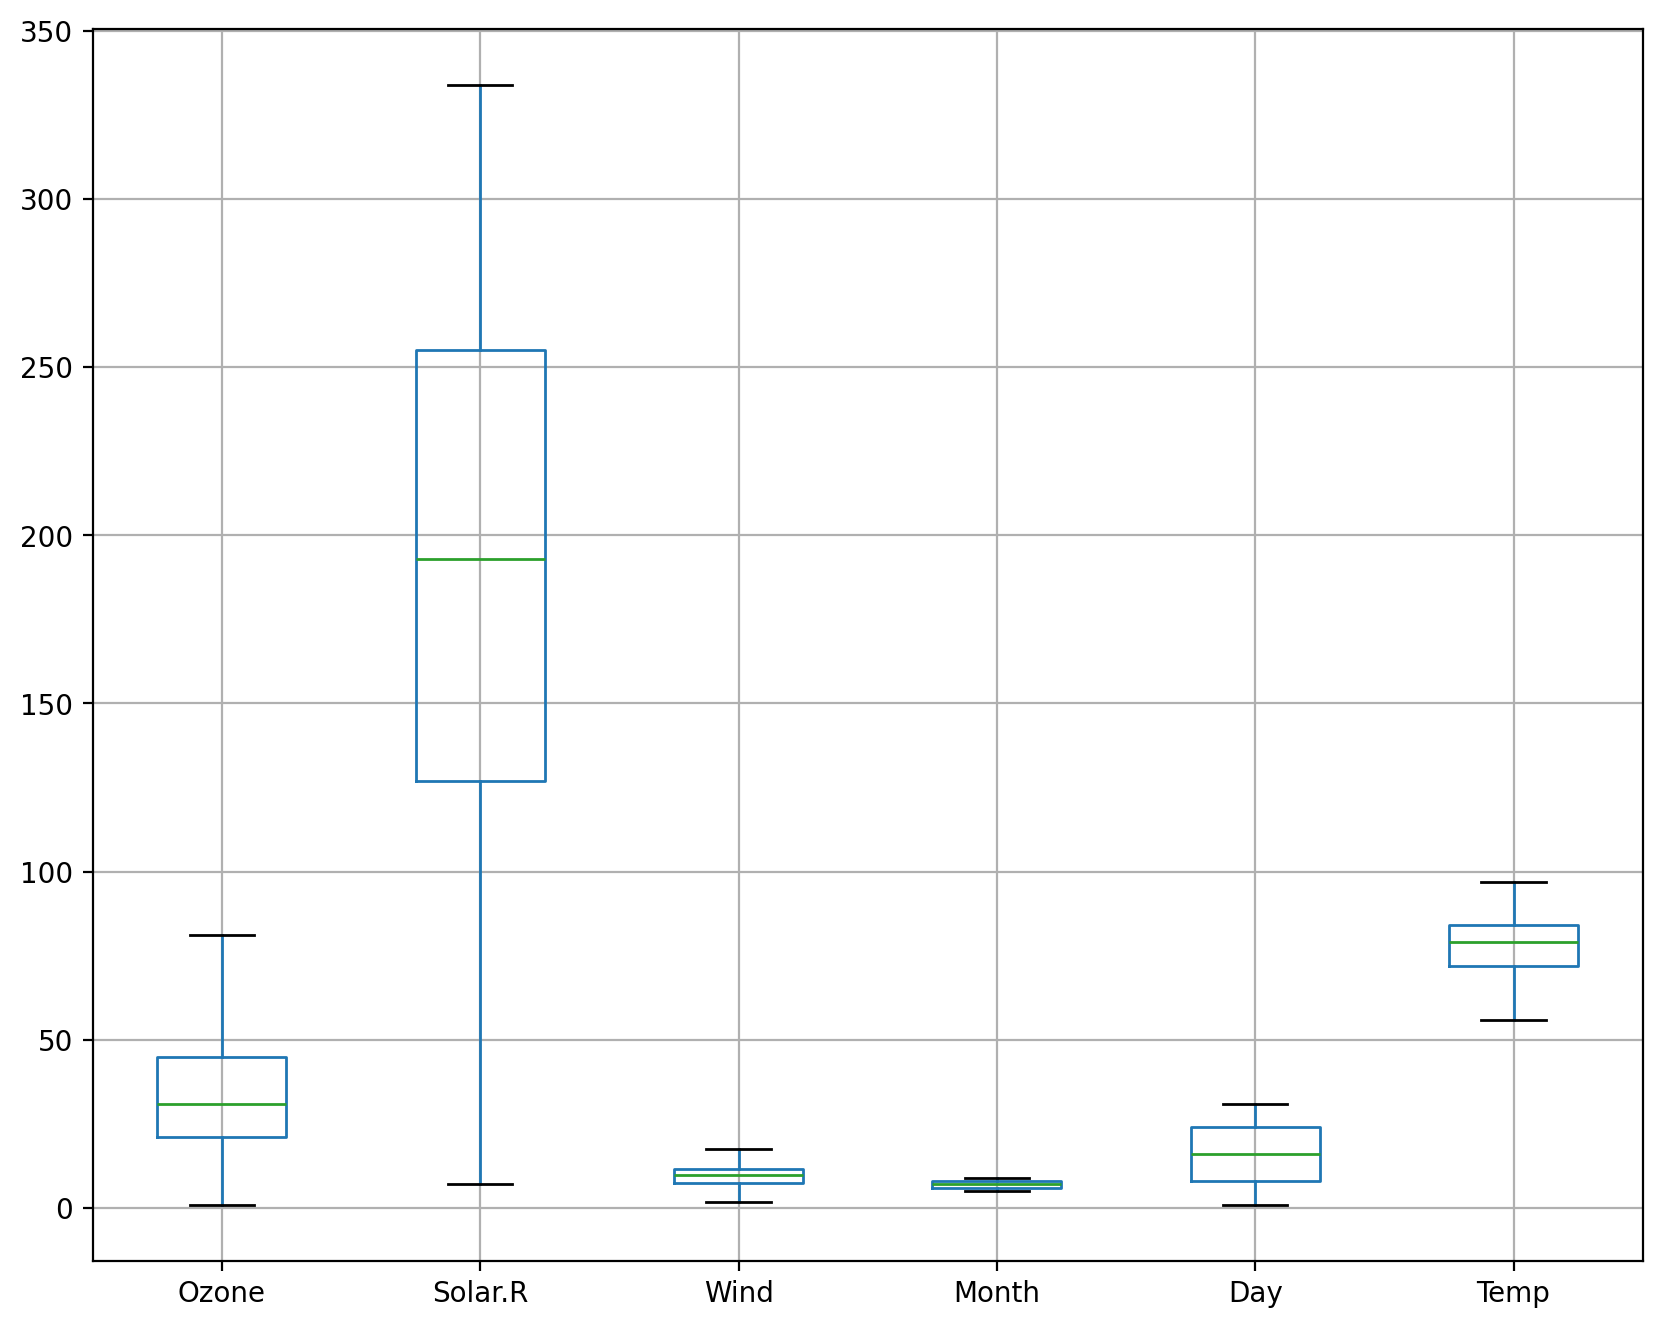

In [32]:
df.boxplot()


## Scatter Plot And Correlation

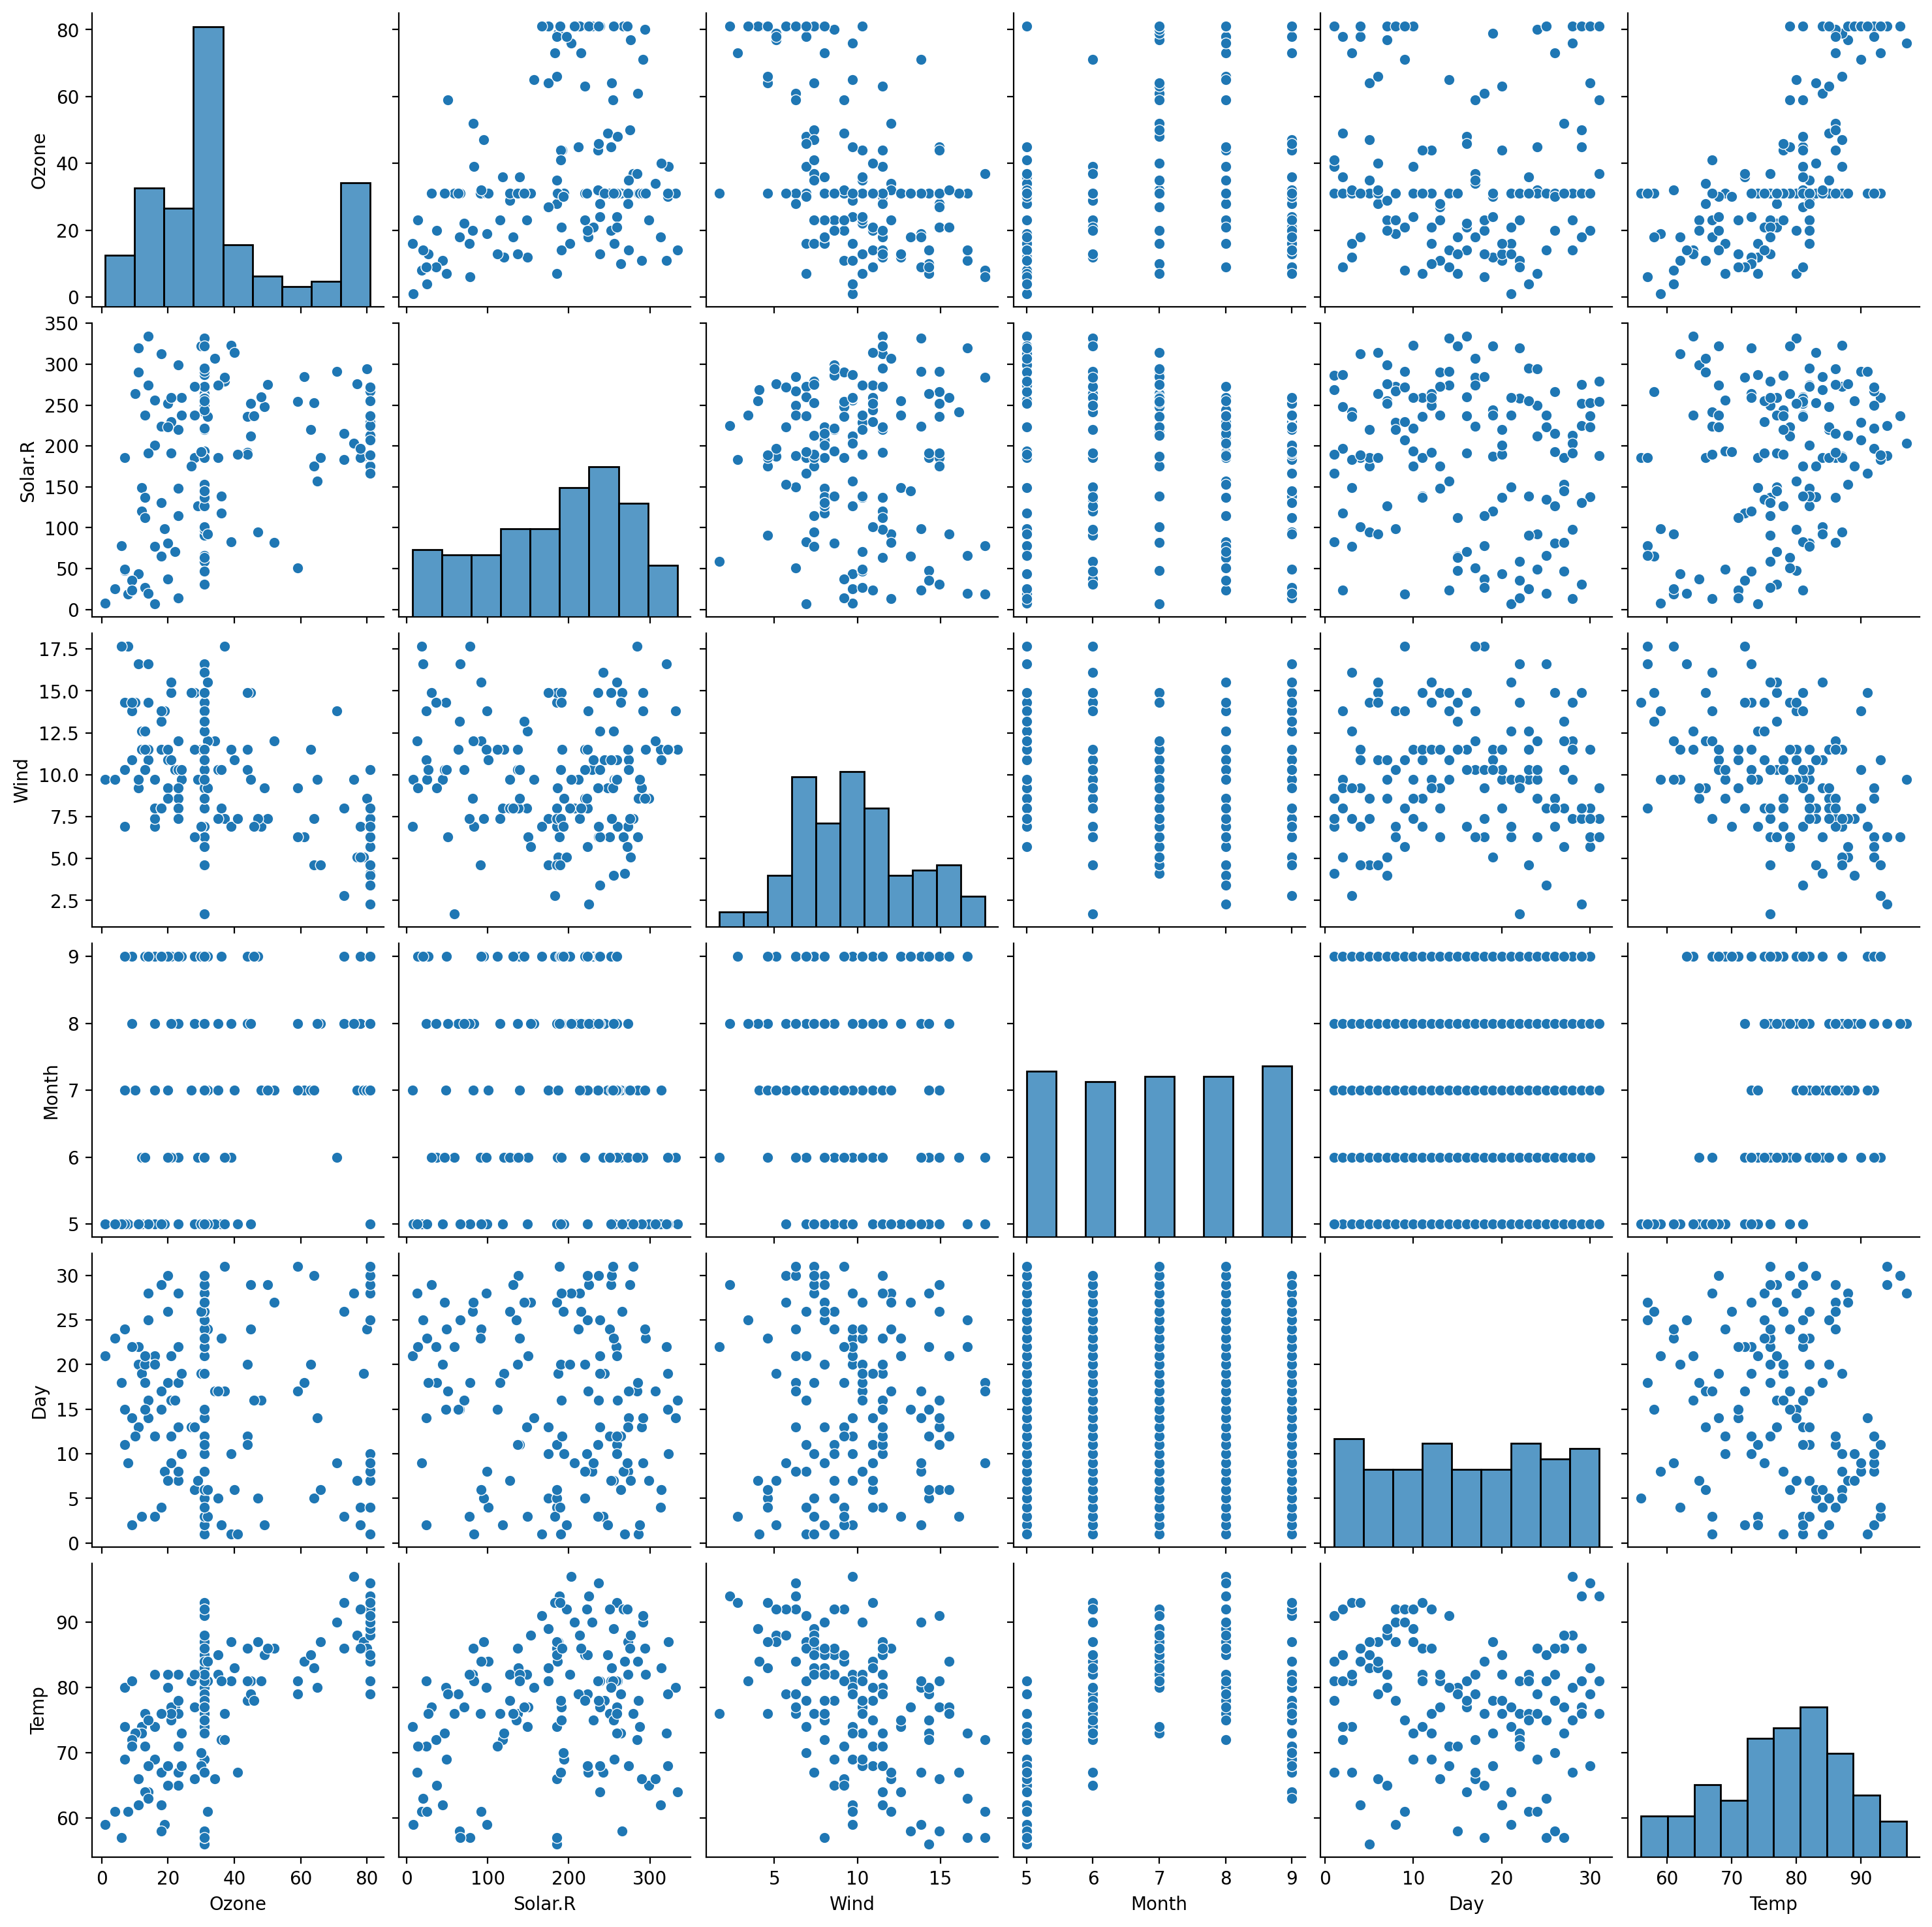

In [33]:
sns.pairplot(df)


In [34]:
df.corr(numeric_only=True)


,Ozone,Solar.R,Wind,Month,Day,Temp
Ozone,1.000000,0.317926,-0.522513,0.183089,-0.042835,0.662773
Solar.R,0.317926,1.000000,-0.053534,-0.080237,-0.151007,0.260677
Wind,-0.522513,-0.053534,1.000000,-0.162988,0.033374,-0.439939
Month,0.183089,-0.080237,-0.162988,1.000000,0.041438,0.408060
Day,-0.042835,-0.151007,0.033374,0.041438,1.000000,-0.122787
Temp,0.662773,0.260677,-0.439939,0.408060,-0.122787,1.000000


<Axes: >

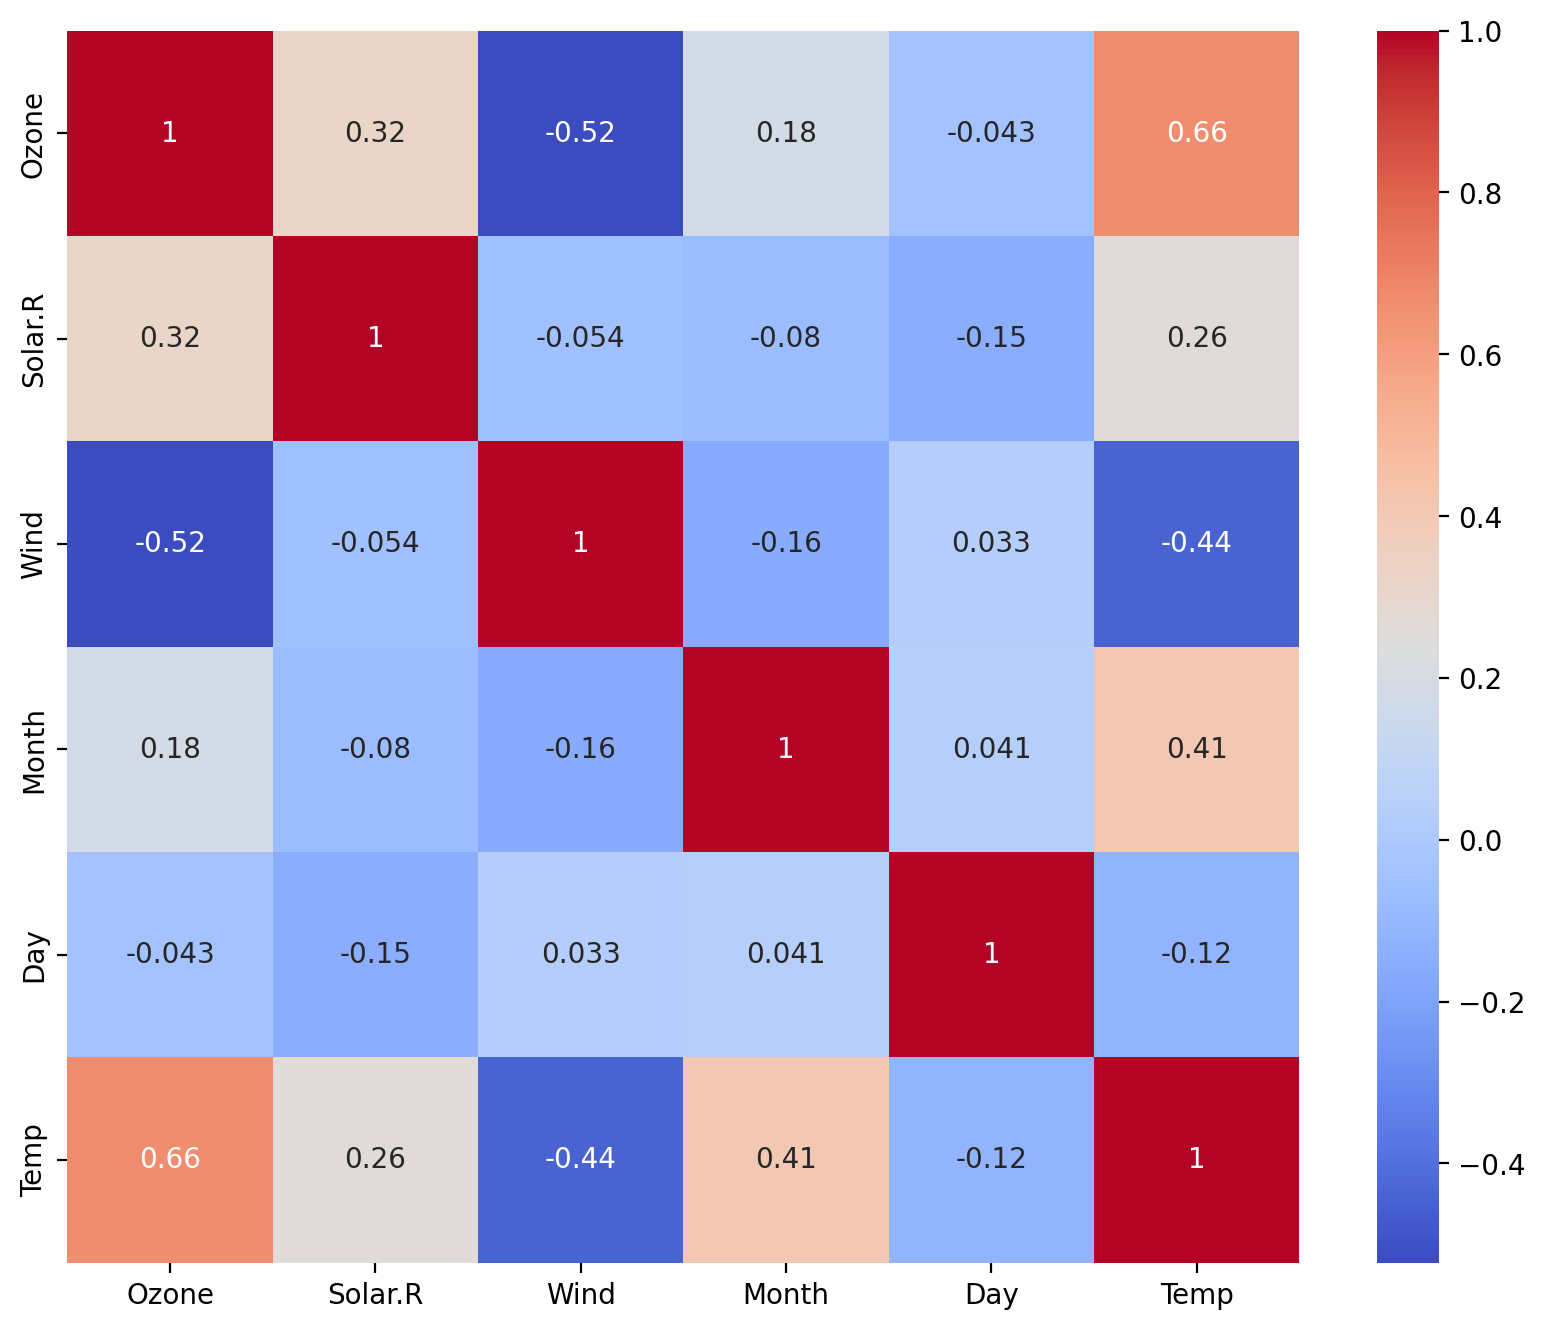

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', square=True )


In [36]:
df.head()


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.000000,7.4,5.0,1.0,67.0,S
2,36.0,118.000000,8.0,5.0,2.0,72.0,C
3,12.0,149.000000,12.6,5.0,3.0,74.0,PS
4,18.0,313.000000,11.5,5.0,4.0,62.0,S
5,31.0,185.366667,14.3,5.0,5.0,56.0,S


In [37]:
df = pd.get_dummies(data= df, columns=["Weather"],dtype = int)


In [38]:
df.head()


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.000000,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.000000,8.0,5.0,2.0,72.0,1,0,0
3,12.0,149.000000,12.6,5.0,3.0,74.0,0,1,0
4,18.0,313.000000,11.5,5.0,4.0,62.0,0,0,1
5,31.0,185.366667,14.3,5.0,5.0,56.0,0,0,1


# scaling 

In [41]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix   


In [42]:
st = StandardScaler()


In [43]:
st.fit_transform(df)


array([[ 0.19019358,  0.05342774, -0.73459309, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.03297826, -0.7768163 , -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-1.10420306, -0.41935011,  0.79941842, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.30078446,  0.08802124, -0.8820942 , ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.25615009, -0.46547478,  0.97641975, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.83639686, -0.62691113, -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027]])

# standardization


In [46]:
scaled_data = pd.DataFrame(st.fit_transform(df) , columns= df.columns)


In [47]:
scaled_data


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.032978,-0.776816,-0.557592,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-1.104203,-0.419350,0.799418,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.836397,1.471761,0.474916,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.256150,0.000000,1.300922,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.747128,0.433956,0.474916,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.300784,0.088021,-0.882094,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.256150,-0.465475,0.976420,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [48]:
scaled_data.describe()


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
count,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,-3.394312e-17,-9.051500e-17,1.470869e-16,1.810300e-16,-2.262875e-17,2.036587e-16,4.242891e-17,-8.485781e-18,-7.849347e-17
std,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00
min,-1.595181e+00,-2.056776e+00,-2.416106e+00,-1.412198e+00,-1.668937e+00,-2.319408e+00,-6.735753e-01,-6.536610e-01,-7.971303e-01
25%,-7.024938e-01,-6.730358e-01,-7.345931e-01,-7.127815e-01,-8.864446e-01,-6.128020e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
50%,-2.561501e-01,8.802124e-02,-5.608800e-02,-1.336465e-02,7.832041e-03,1.338381e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
75%,3.687310e-01,8.029536e-01,4.749160e-01,6.860522e-01,9.021087e-01,6.671525e-01,1.484615e+00,1.529845e+00,1.254500e+00
max,1.975568e+00,1.713916e+00,2.289180e+00,1.385469e+00,1.684601e+00,2.053770e+00,1.484615e+00,1.529845e+00,1.254500e+00


# Normalization
# =============

In [49]:
NM = MinMaxScaler()


In [50]:
minmax_scaled = pd.DataFrame(NM.fit_transform(df) , columns= df.columns)


In [51]:
minmax_scaled


,Ozone,Solar.R,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,0.5000,0.559633,0.357367,0.0,0.000000,0.268293,0.0,0.0,1.0
1,0.4375,0.339450,0.394984,0.0,0.033333,0.390244,1.0,0.0,0.0
2,0.1375,0.434251,0.683386,0.0,0.066667,0.439024,0.0,1.0,0.0
3,0.2125,0.935780,0.614420,0.0,0.100000,0.146341,0.0,0.0,1.0
4,0.3750,0.545464,0.789969,0.0,0.133333,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
152,0.2375,0.660550,0.614420,1.0,0.966667,0.292683,0.0,0.0,1.0
153,0.5000,0.559633,0.357367,0.0,0.000000,0.268293,1.0,0.0,0.0
154,0.3625,0.568807,0.326019,1.0,0.833333,0.341463,0.0,1.0,0.0
155,0.3750,0.422018,0.721003,1.0,0.866667,0.512195,0.0,0.0,1.0
